In [1]:
import pandas as pd

train_data = pd.read_csv('./train/train.csv', nrows=5000000)

train_data.to_csv('./train/t.csv')

In [2]:
import pandas as pd

train = pd.read_csv('./train/t.csv', usecols=['user_id', 'content_id', 'answered_correctly', 'prior_question_had_explanation', 'prior_question_elapsed_time'])
questions = pd.read_csv('./train/questions.csv', usecols=['question_id', 'part', 'tags'])
questions['tags'] = questions[('tags')].str.split(' ')

train = train[train.answered_correctly != -1]
train = train.dropna()

train['content_id'].astype(int)
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype(int)
train.reset_index(drop=True)

questions['question_id'].astype(int)
questions.reset_index(drop=True)
dict_q = dict(zip(questions.question_id, questions.part))
dict_q2 = dict(zip(questions.question_id, questions.tags))

train['part'] = train['content_id'].map(dict_q)
train['tags'] = train['content_id'].map(dict_q2)

print(train)

           user_id  content_id  answered_correctly  \
1              115        5716                   1   
2              115         128                   1   
3              115        7860                   1   
4              115        7922                   1   
5              115         156                   1   
...            ...         ...                 ...   
4999995  106763796        3610                   1   
4999996  106763796        8907                   1   
4999997  106763796        4039                   1   
4999998  106763796         996                   1   
4999999  106763796         471                   0   

         prior_question_elapsed_time  prior_question_had_explanation  part  \
1                            37000.0                               0     5   
2                            55000.0                               0     1   
3                            19000.0                               0     1   
4                            11000.0   

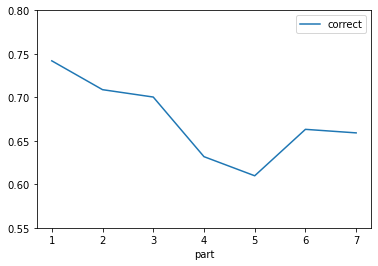

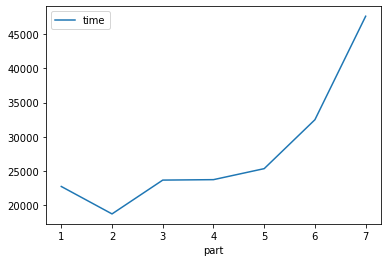

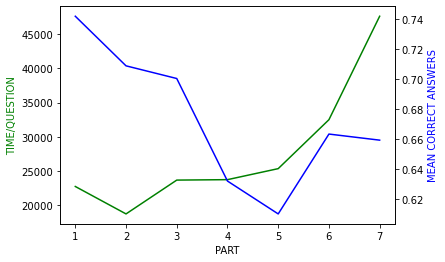

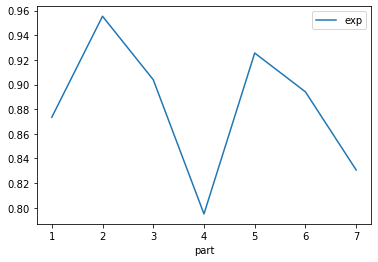

In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

questions = pd.read_csv('./train/questions.csv', usecols=['question_id', 'part'])
question_data = {'content_id': questions['question_id'], 'part': questions['part']}
question_df = pd.DataFrame(question_data)
train = pd.read_csv('./train/t.csv', usecols=['user_id', 'content_id', 'answered_correctly', 'prior_question_had_explanation', 'prior_question_elapsed_time'])
train = train[train.answered_correctly != -1]
train = train.dropna()

train['content_id'].astype(int)
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype(int)
train_data['prior_question_elapsed_time'] = train_data['prior_question_elapsed_time'].shift(-1)
train.reset_index(drop=True)

question_df['content_id'].astype(int)
question_df.reset_index(drop=True)
dict_q = dict(zip(question_df.content_id, question_df.part))

train['part'] = train['content_id'].map(dict_q)

correct = train.groupby('part')

data = {'part': correct['part'].mean(), 'correct': correct['answered_correctly'].mean()}
part_exp = {'part': correct['part'].mean(), 'exp': correct['prior_question_had_explanation'].mean()}
part_time = {'part': correct['part'].mean(), 'time': correct['prior_question_elapsed_time'].mean()}

df = pd.DataFrame(data, columns=['part', 'correct'])
plot = df.plot(x='part', y='correct', kind='line')
plot.set_ylim(0.55, 0.8)
plt.show()

x = correct['part'].mean()
y1 = correct['prior_question_elapsed_time'].mean()
y2 = correct['answered_correctly'].mean()

df3 = pd.DataFrame(part_time, columns=['part', 'time'])
plot3 = df3.plot(x='part', y='time', kind='line')
plt.show()


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('PART')
ax1.set_ylabel('TIME/QUESTION', color='g')
ax2.set_ylabel('MEAN CORRECT ANSWERS', color='b')

plt.show()


df1 = pd.DataFrame(part_exp, columns=['part', 'exp'])
plot1 = df1.plot(x='part', y='exp', kind='line')
plot1.set_ylim()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

questions_data = pd.read_csv('./train/questions.csv', usecols=['question_id', 'part', 'tags'])

train_data = pd.read_csv('./train/t.csv', usecols=['user_id', 'answered_correctly', 'content_id', 'prior_question_elapsed_time', 'content_type_id'])
train_data = train_data[train_data.answered_correctly != -1]

#data = {'user_id': train_data['user_id'], 'answered_correctly': train_data['answered_correctly'], 'content_id': train_data['content_id'],
 #       'content_type_id': train_data['content_type_id'], 'part': questions_data['part'], 'tags': questions_data['tags']}

data = {'user_id': train_data['user_id'], 'answered_correctly': train_data['answered_correctly'], 'content_id': train_data['content_id'],
       'part': questions_data['part'], 'timestamp': train_data['prior_question_elapsed_time']}    

data_frame = pd.DataFrame(data)
data_frame = data_frame.dropna()

grouped_data = data_frame.groupby('user_id')

print(grouped_data.corr())

'''
graph_data = {'user_id': data_frame['user_id'], 'answers': data_frame['answered_correctly']}
df = pd.DataFrame(graph_data, columns=['user_id', 'answers'])
df.plot(y='answers', x='user_id', kind='scatter')
plt.show()
'''

#print(df.corr())

                             answered_correctly  content_id      part  \
user_id                                                                 
115.0    answered_correctly            1.000000    0.217572       NaN   
         content_id                    0.217572    1.000000       NaN   
         part                               NaN         NaN       NaN   
         timestamp                     0.050574   -0.169925       NaN   
124.0    answered_correctly            1.000000   -0.239800       NaN   
...                                         ...         ...       ...   
137455.0 timestamp                    -0.209372    0.126462 -0.136257   
138650.0 answered_correctly            1.000000    0.123617  0.039499   
         content_id                    0.123617    1.000000 -0.088130   
         part                          0.039499   -0.088130  1.000000   
         timestamp                     0.095754    0.254259  0.122671   

                             timestamp  
user_id  

"\ngraph_data = {'user_id': data_frame['user_id'], 'answers': data_frame['answered_correctly']}\ndf = pd.DataFrame(graph_data, columns=['user_id', 'answers'])\ndf.plot(y='answers', x='user_id', kind='scatter')\nplt.show()\n"

                            OLS Regression Results                            
Dep. Variable:     answered_correctly   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                 2.346e+04
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:12:13   Log-Likelihood:            -2.9093e+06
No. Observations:             4405157   AIC:                         5.819e+06
Df Residuals:                 4405155   BIC:                         5.819e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

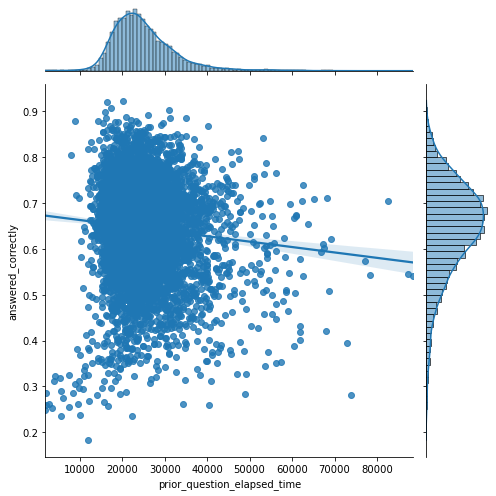

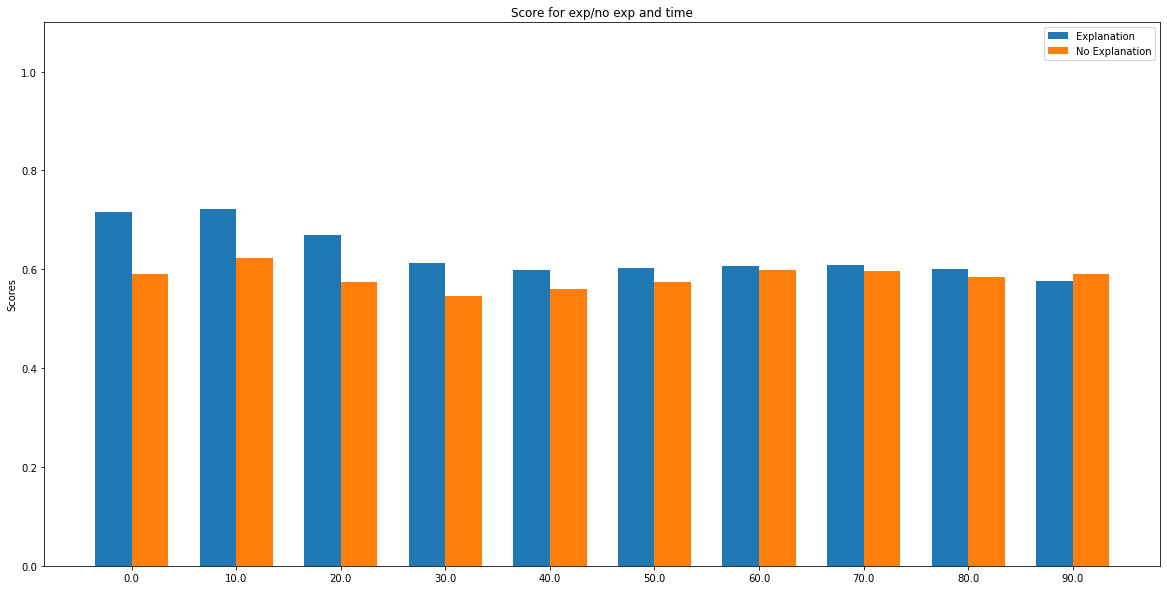

HAD EXPLANATION
0.6760674242120209
NO EXPLANATION
0.587233168192507
COMPLETE MEAN
0.6716509763443165


In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

questions = pd.read_csv('./train/questions.csv', usecols=['question_id', 'part'])
question_data = {'content_id': questions['question_id'], 'part': questions['part']}
question_df = pd.DataFrame(question_data)

train_data = pd.read_csv('./train/t.csv', usecols=['user_id', 'answered_correctly', 'prior_question_had_explanation', 'prior_question_elapsed_time', 'content_id'])
train_data = train_data[train_data.answered_correctly != -1]
train_data['prior_question_elapsed_time'] = train_data['prior_question_elapsed_time'].shift(-1)
train_data = train_data.dropna()

train_data['prior_question_had_explanation'] = train_data['prior_question_had_explanation'].astype(int)
train_data['prior_question_elapsed_time'] = train_data['prior_question_elapsed_time'].astype(int)

question_df['content_id'].astype(int)
question_df.reset_index(drop=True)
dict_q = dict(zip(question_df.content_id, question_df.part))

train_data['part'] = train_data['content_id'].map(dict_q)


#USE SPECIFIC PART
#train_data = train_data[(train_data['part'] == 3)]

train_data = train_data[train_data.groupby('user_id').user_id.transform('count')>100]

lower_time = 15000
medium_time = 30000

times = []

for i in range(10):
    val = i * 10 * 1000
    times.append(val)

time_dfs_exp = []
time_dfs_no_exp = []

for i in range(len(times)):
    if i == 0:
        df = train_data[(train_data['prior_question_elapsed_time'] < times[i + 1]) & (train_data['prior_question_had_explanation'] == 1)]
    elif i == len(times) - 1:
        df = train_data[(train_data['prior_question_elapsed_time'] >= times[i]) & (train_data['prior_question_had_explanation'] == 1)]
    else:
        df = train_data[(train_data['prior_question_elapsed_time'] < times[i + 1]) & (train_data['prior_question_elapsed_time'] >= times[i]) & (train_data['prior_question_had_explanation'] == 1)]
    
    time_dfs_exp.append(df)
    i += 1
    
for i in range(len(times)):
    if i == 0:
        df = train_data[(train_data['prior_question_elapsed_time'] < times[i + 1]) & (train_data['prior_question_had_explanation'] == 0)]
    elif i == len(times) - 1:
        df = train_data[(train_data['prior_question_elapsed_time'] >= times[i]) & (train_data['prior_question_had_explanation'] == 0)]
    else:
        df = train_data[(train_data['prior_question_elapsed_time'] < times[i + 1]) & (train_data['prior_question_elapsed_time'] >= times[i]) & (train_data['prior_question_had_explanation'] == 0)]
    
    time_dfs_no_exp.append(df)
    i += 1


# OLS Regression
m = ols('answered_correctly ~ prior_question_elapsed_time', train_data).fit()
print(m.summary())
new_data = train_data.groupby('user_id').mean()

# REGRESSION PLOT
sns.jointplot(x='prior_question_elapsed_time', y='answered_correctly', data=new_data, kind='reg', fit_reg=True, height=7)
plt.show()


# SCORE PLOTTED AGAINST TIME INTERVALS FOR QUESTIONS
labels = [i / 1000 for i in times]
exp_mean = []
no_exp_mean = []

for i in range(len(labels)):
    exp_mean.append(time_dfs_exp[i]['answered_correctly'].mean())
    i += 1
    
for i in range(len(labels)):
    no_exp_mean.append(time_dfs_no_exp[i]['answered_correctly'].mean())
    i += 1

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)

rects1 = ax.bar(x - width/2, exp_mean, width, label='Explanation')
rects2 = ax.bar(x + width/2, no_exp_mean, width, label='No Explanation')
ax.set_ylabel('Scores')
ax.set_title('Score for exp/no exp and time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0.0, 1.1)
plt.show()


# MEAN SCORE FOR QUESTIONS WHERE AN EXPLANATION WAS GIVEN FOR THE PREVIOUS QUESTION
true_data = train_data[train_data.prior_question_had_explanation == 1]
false_data = train_data[train_data.prior_question_had_explanation == 0]
#true_data = true_data.reset_index()

index_data = true_data
index_data = index_data.reset_index()

answers_sum = index_data['answered_correctly'].sum()
total_sum = index_data['prior_question_had_explanation'].sum()

print('HAD EXPLANATION')
print(answers_sum / total_sum)

new_answers_sum = false_data['answered_correctly'].sum()
new_total_sum = false_data['prior_question_had_explanation'].count()

print('NO EXPLANATION')
print(new_answers_sum / new_total_sum)

total_mean = train_data['answered_correctly'].mean()
print('COMPLETE MEAN')
print(total_mean)

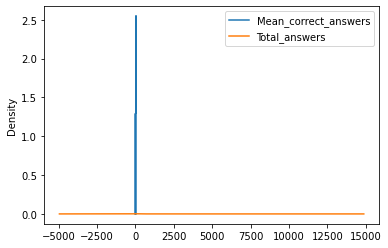

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

#train_data.groupby(['user_id'])['answered_correctly'].mean()
#train_data.loc[train_data.user_id]
#train_data.groupby(['user_id']).tail()
train_data = pd.read_csv('./train/t.csv', usecols=['user_id', 'answered_correctly', 'prior_question_elapsed_time'])
train_data = train_data[train_data.answered_correctly != -1]
train_data = train_data[train_data.prior_question_elapsed_time != 0]
train_data = train_data.dropna()
grouped = train_data.groupby('user_id')

new_df = train_data
new_df = new_df.dropna()


new_group = new_df.groupby('user_id')

mean = grouped.mean()

answers_data = new_group['answered_correctly'].count()
mean_correct = mean['answered_correctly']

new_data = {'total_answers': answers_data, 'mean_correct_answers': mean['answered_correctly']}

df = pd.DataFrame(new_data)

#print(df.corr())

graph_data = {'Mean_correct_answers': mean_correct,
             'Total_answers': answers_data}

df = pd.DataFrame(graph_data, columns=['Mean_correct_answers', 'Total_answers'])
df.plot(kind='density')
plt.show()

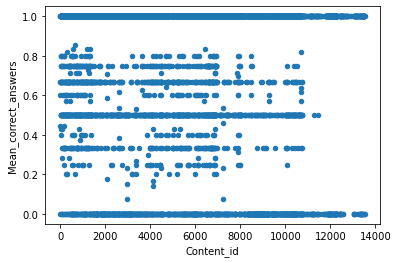

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 200


train_data = pd.read_csv('./train/t.csv', usecols=['user_id', 'content_id', 'answered_correctly', 'content_type_id'])
question_data = pd.read_csv('./train/questions.csv', usecols=['question_id', 'tags', 'part'])

new_data = {'user_id': train_data['user_id'], 'content_id': train_data['content_id'], 'correct': train_data['answered_correctly'], 'part': question_data['part']}

data = pd.DataFrame(new_data)

data = data[data.correct != -1]
data = data[data.content_id != -1]
data = data.dropna()

grouped = data.groupby('content_id')

mean = grouped.mean()
mean = mean.reset_index()


answers_data = mean['correct']
content_data = mean['content_id']

answered_questions = data.groupby(['user_id', 'correct']).count()

#print(answered_questions)

graph_data = {'Content_id': content_data,
             'Mean_correct_answers': answers_data}

#print(mean)

df = pd.DataFrame(graph_data, columns=['Content_id', 'Mean_correct_answers'])
df.plot(x='Content_id', y='Mean_correct_answers', kind='scatter')
plt.show()



In [24]:
train_data['answered_correctly'].value_counts()


 1    13413
 0     6172
-1      415
Name: answered_correctly, dtype: int64